## Linear Models

### You may recall from a Statistics class, the notion of fitting a line, or a **linear model**, to some data. It may have been referred to as a regression model. 

### $$ y = \beta_1 x + \beta_0$$

### In Statistics, the emphasis in performing a regression analysis is determining whether there is a linear relationship between two variables, and how well that relationship explains the data.  A common statistic is $r^2$ or correlation coefficient squared which expresses the fraction of the data variability explained by the line.  

### What sometimes gets lost in the Statistics presentation is that the equation above represents a model of the data.  That is, the form of the model (linear) and the parameters (especially $\beta_1$) have a meaning associated with them. 

### By fitting the model to the data we express our scientific intuition that **the data was generated by a process reflected in the model**.  In the case of a linear model we are hypothesizing a linear relationship expressed by a **rate** given by the **parameter** $\beta_1$.  Ideally, you chose a model so that that knowing that rate gives you some intuition about the process.   

### If our model is meaningful, we should be able to use the model to predict new data points.  This is going to be a point of emphasis throughout this class.  Models of data, especially complicated ones like machine learning, are only meaningful if they can predict outcomes of new experiments.  



### Least Squares Fitting 

### In order to fit a model to data, we need a way to measure how good our model is, or an **error** measurement, that we can use to evaluate our model. Together with a procedure to update models, we can try and learn models that minimize error - that is to say, models that best fit the data. 

### Least squares fitting is the most basic and direct approach for learning and evaluating models. Least-squares fitting seeks to minimize the sum of squared errors. Squared errors are calculated as the square of the difference between the model prediction of a data point, and the data point itself. 

### An important way to think about this is as an **error function**. 
### $$ error = f(\beta_1,\beta_0,......|{x,y}) $$
### The error function of a model, given the data, is a function whose output is the error.  The input variables are possible values of the parameters, **while the data is fixed**. 
### In our linear model, the parameters are $\beta_1$ and $\beta_0$
### The parameters which result in a model with the lowest error, defined in terms of least squares, is the best model. When we talk about fitting a model with least squares, we mean finding the solution for the **parameters** that has the lowest **least square error** - the lowest value for the sum of squared errors.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import random 
from scipy import stats 

### Seed the random number generator

In [2]:
#set the seed for the random number generator
myseed = 1234
#create the random number generator object
rng = random.default_rng(seed = myseed)

In [3]:
#let's test the random number generator with a normal distribution
# the line below makes an array with 10 random numbers drawn from a normal distribution with a mean of 1 and a standard deviation of 2
x = rng.normal(1,2,10)

## Simulate Data 
### I hope by the end of this class, you are comfortable with the idea of simulating data in order to test a method or your code. 
### This is a really useful skill.  When you encounter a new data analysis method or piece of code, if you just apply it to your real data its hard to understand what its doing.  But, if you apply it to data with structure you know in advance, you can evaluate how the method works

In [4]:
# Create some data
# x is an evenly space array of integers
x = np.arange(0, 20)

# y is some data with underlying relationship y = beta_1* x + beta_0
#  For this example, the true relation of the data is y = 2x + 5
true_beta_1 = 2
true_beta_0 = 5
ylinear = true_beta_1 * x + true_beta_0
noise_std = 20
# Add some noise to the y dimension
noise = rng.normal(0, noise_std, len(x))
y = ylinear + noise

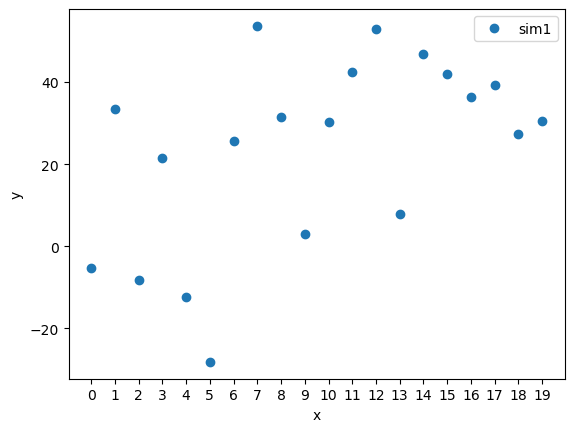

In [5]:
#plot the data.  ms is the markersize 
plt.plot(x, y, '.', ms=12,label = 'sim1');
plt.legend()
plt.xlabel('x')
plt.xticks(x)
plt.ylabel('y')
plt.show()

## Centering Data 
### To make my life easy, Im going to remove the mean of the x and y data.  
### This is called **centering** the data, and is often required in data analysis
### Centering has no effect on the linear relationship between the variables ($\beta_1$).  

In [6]:
x_c = x - np.mean(x)
y_c = y - np.mean(y)

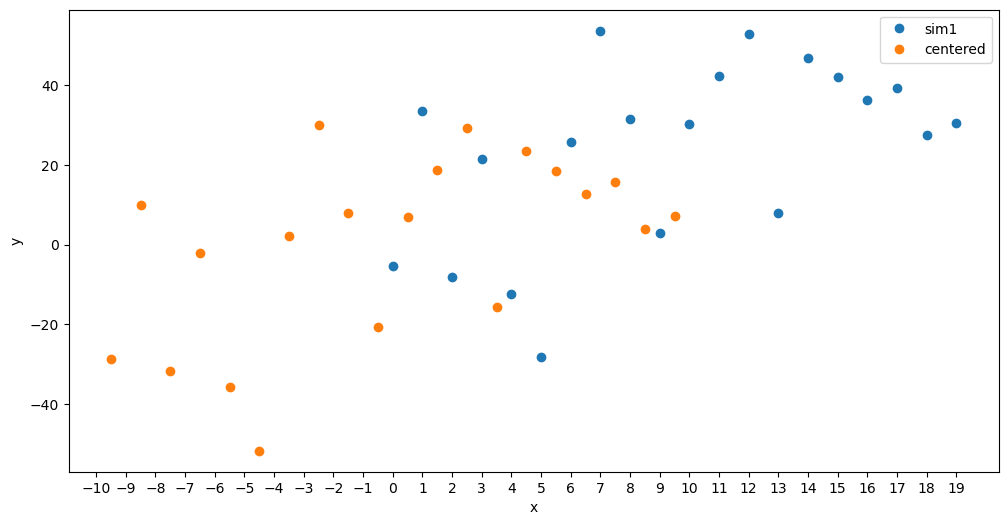

In [7]:
plt.figure(figsize = (12,6))
plt.plot(x, y, '.', ms=12,label = 'sim1');
plt.plot(x_c, y_c, '.', ms=12,label = 'centered');
plt.legend()
plt.xlabel('x')
plt.xticks(np.arange(-10,20,1))
plt.ylabel('y')
plt.show()


### First, lets just fit a line using (x,y)

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
rsquared = r_value**2  
yfit = intercept+slope*x

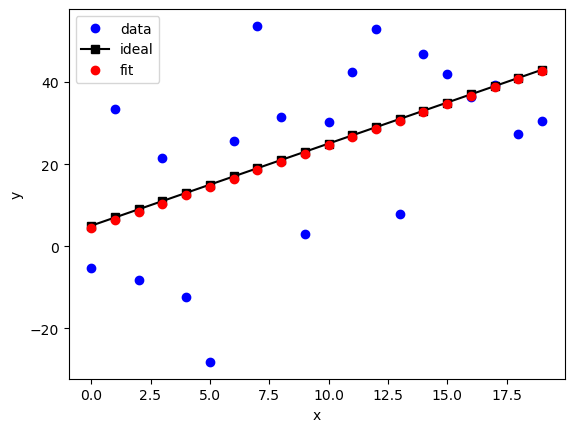

In [9]:
plt.figure()
plt.plot(x,y,'bo',label = 'data')
plt.plot(x,ylinear,'ks-',label = 'ideal')
plt.plot(x,yfit,'ro',label = 'fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Lets repeat with the centered data. 

In [10]:
slope_c, intercept_c, r_value, p_value, std_err = stats.linregress(x_c,y_c)
rsquared_c = r_value**2  
yfit_c = intercept_c+slope_c*x_c

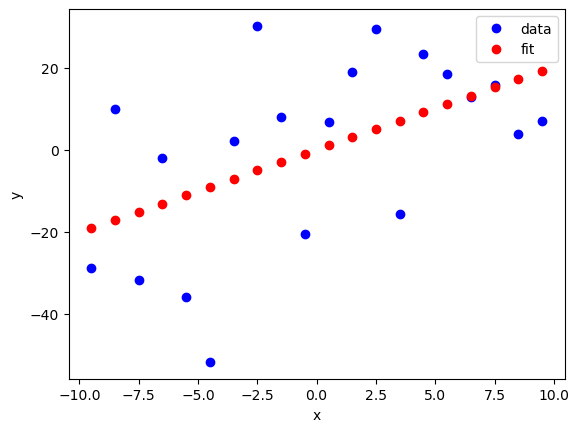

In [11]:
plt.figure()
plt.plot(x_c,y_c,'bo',label = 'data')
#plt.plot(x,ylinear,'ks-',label = 'ideal')
plt.plot(x_c,yfit_c,'ro',label = 'fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### In this next example, I'm also going to draw x from a random number generator

In [12]:
nsamples = 100
mux = 0
sdx = 5
x = random.normal(mux,sdx,nsamples)
beta0 = 0
beta1 = 2
sd_noise = 20
epsilon = np.random.normal(0,sd_noise,nsamples)
ylinear = beta0+beta1*x
y = beta0+beta1*x+ epsilon
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
rsquared = r_value**2
yfit = intercept+slope*x


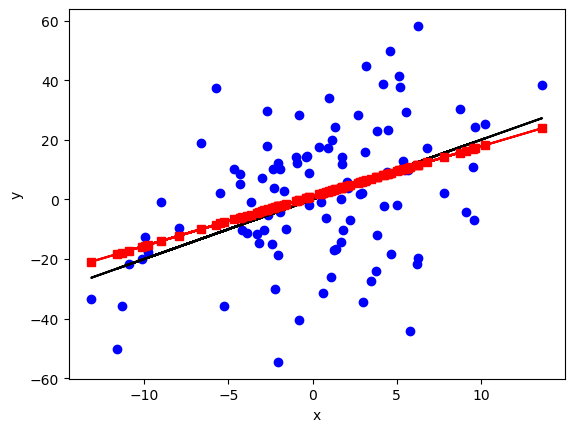

In [13]:
plt.figure()
plt.plot(x,y,'bo')
plt.plot(x,ylinear,'k-')
plt.plot(x,yfit,'rs-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Error Function  
### We can understand better how that slope was selected by examining an error function. 
### The error function shows the least squares error (summed square error from all observations) **as a function of the parameters of the model**
### Here I purposely chose a model with only one interesting parameter, the slope $\beta_1$

In [14]:
betatest = np.linspace(0.1, 4,40)
error = np.zeros(40)
for j in range(len(betatest)):
    yprime = beta0 + betatest[j]*x
    error[j] = np.sum(np.square(y-yprime))
    


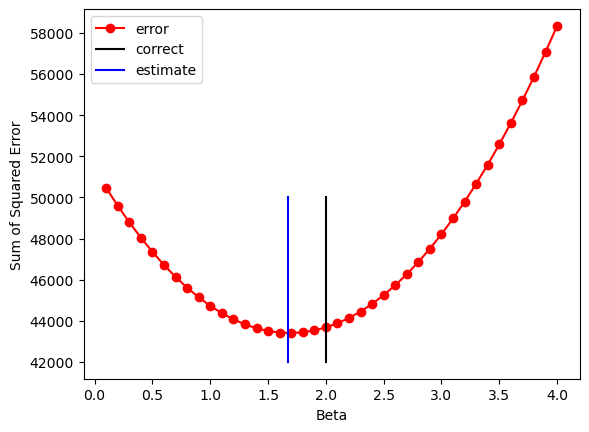

In [15]:
plt.figure()
plt.plot(betatest,error,'ro-',label ='error')
plt.plot([beta1,beta1],[42000,50000],'k-',label='correct')
plt.plot([slope,slope],[42000,50000],'b-',label = 'estimate')
plt.xlabel('Beta')
plt.legend()
plt.ylabel('Sum of Squared Error')
plt.show()

## Optimization
### Optimization is a vast field focused on how to estimate the best parameters to fit a model to data. 
### The concept of an error function is central to optimization, although you may encounter in different guises, including a likelihood (probability models) or a loss function (machine learning). 


## Linear and Nonlinear Optimization 
### Linear Optimization problems are easy to solve and have direct solutions (usually by some Linear Algebra)
### Linear regression models use these methods. 
### Interestingly, many nonlinear models can also be expressed as Linear Models through transformations, and have exact solutions 
### More importantly, what matters for Linear optimization is whether the optimization problem is Linear, not if the model is Linear.   